# Analysis of Nanocamp Science Identity Construct

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl

import re

In [2]:
df = pd.read_excel('Data/GEAR UP Nanocamp Paired Survey.xlsx')
df.set_index('Student ID', inplace=True)

In [3]:
df.head()

,1A [I am good at science.],2A [I know a lot about science.],3A [I am good at most science experiments.],4A [I understand science topics.],5A [I learn new science topics easily.],6A [I can use science equipment and/or technology to collect data.],7A [I know how to use the scientific method/process.],8A [I can talk with others about science related topics.],9A [I can create my own science experiments.],10A [I can use my observations to create a hypothesis.],...,10B [I can use my observations to create a hypothesis.],11B [My friends see me as someone that is good at science.],"12B [When giving a science report, I feel like a scientist.]",13B [Others see me as a scientist when I share my observations.],"14B [When I share data I've collected, I feel like a scientist.]",15B [I can help others with science related topics.],16B What is one of the most interesting things you learned about nanoscience this week?,17B What was one of the most fun or interesting activities you participated in this week?,18B What are some suggestions you have for improving this camp?,19B Are there any other comments you would like to share?
Student ID,,,,,,,,,,,,,,,,,,,,,
1,Disagree,Disagree,Agree,Agree,Neither,Agree,Neither,Agree,Disagree,Agree,...,Agree,Agree,Neither Agree nor Disagree,Disagree,Disagree,Disagree,light,drop oil to coins,NaN,Thank you guys!!!!
2,Neither,Disagree,Agree,Agree,Neither,Strongly Agree,Neither,Agree,Disagree,Agree,...,Agree,Disagree,Disagree,Disagree,Agree,Neither Agree nor Disagree,Nanometers,ferofluids,everything is great,nope
3,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree,learning about the structures of carbon was my...,I enjoyed playing with the UV beads and the li...,"Would like to go more in depth, since we tende...",NaN
4,Agree,Neither,Agree,Neither,Neither,Agree,Neither,Neither,Neither,Agree,...,Strongly Agree,Neither Agree nor Disagree,Agree,Agree,Agree,Neither Agree nor Disagree,I thought the quantum dots were cool,I liked making the bracelets and the spectrometer,SOme more game icebreakers like the waterbottl...,I really liked the food :)
5,Disagree,Neither,Neither,Agree,Agree,Disagree,Neither,Disagree,Agree,Agree,...,Strongly Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree,Disagree,How small a nanometer is and the density of a ...,I really enjoyed making bracelets,More time spent on hand-on's activities and le...,Thanks for the experience!


In [57]:
answer_map = {'strongly disagree': 1, 'disagree': 2, 'neither agree nor disagree': 3, 'neither': 3,
              'agree': 4, 'strongly agree': 5, np.nan: 0}

In [80]:
questions = df.columns
DATA = {re.findall(r'\[.*?\]', q)[0]: [] for q in questions if 'A [' in q}
N = len(DATA)

for i, q in enumerate(questions):
    if 'A [' in q or 'B [' in q:
        question = list(DATA.keys())[i % N]
        answers = np.array([answer_map[str(x).lower()] if x is not np.nan else answer_map[np.nan]
                            for x in df.iloc[:, i] ])
        DATA[question].append(answers)

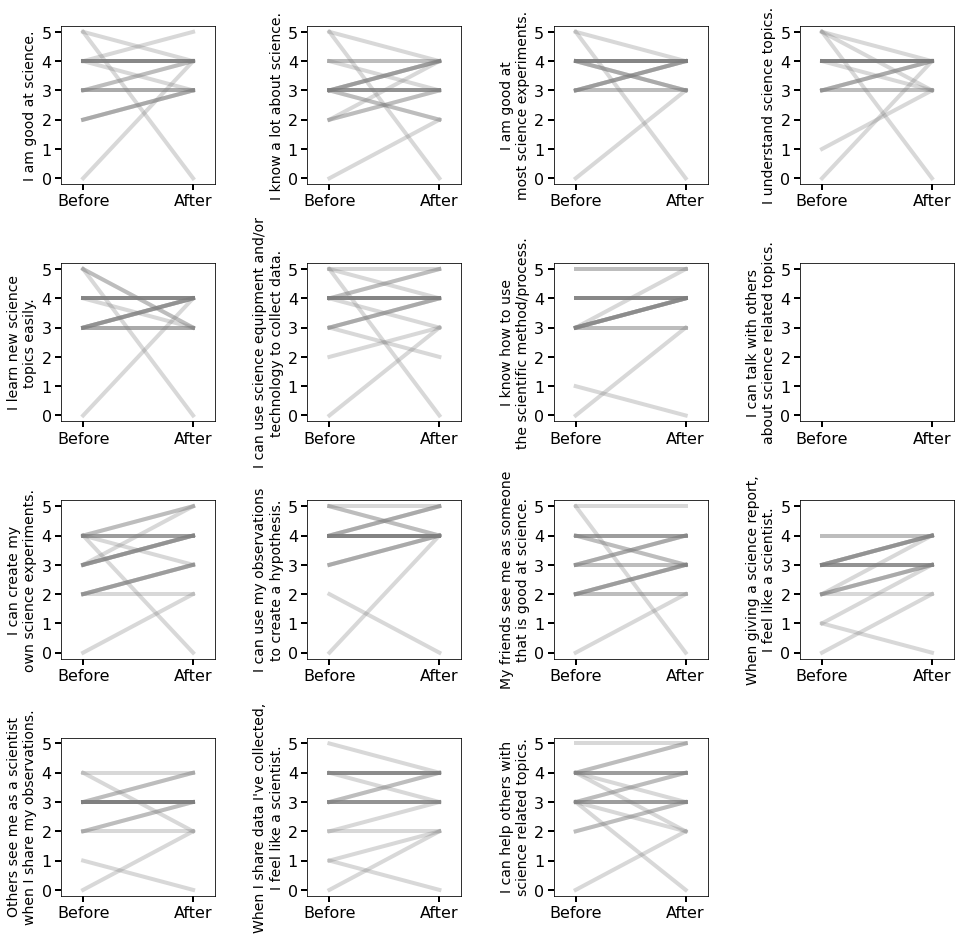

In [96]:
ncols = 4
nrows = N // nrows + 1
fig, axes = plt.subplots(figsize=(ncols * 4, 4 * nrows), ncols=ncols, nrows=nrows)
plt.subplots_adjust(wspace=0.6, hspace=0.5)

for i in range(int(ncols * nrows)):
    row, colm = np.unravel_index(i, (nrows, ncols))
    if i >= N:
        axes[row, colm].axis('off')
    else:
        q = list(DATA.keys())[i]
        axes[row, colm].plot(DATA[q], c=plt.cm.tab20(14), alpha=0.3, linewidth=4)
        question = q.replace('[', '').replace(']', '')
        if ',' in question:
            question = question.replace(', ', ',\n')
        elif len(question) > 30:
            split = question.split(' ')
            n = len(split)
            question = ' '.join(split[:n // 2 + 1]) + '\n' + ' '.join(split[n // 2 + 1:])
        axes[row, colm].set_ylabel(question, fontsize=14)
        axes[row, colm].set_yticks(np.arange(6))
        axes[row, colm].set_xticks([0, 1])
        axes[row, colm].set_xticklabels(['Before', 'After'])
        axes[row, colm].set_xlim(-0.2, 1.2)
        axes[row, colm].set_ylim(-0.2, 5.2)
        axes[row, colm].tick_params(width=2, length=6, labelsize=16)
plt.savefig(f'/Figures/b.png', dpi=800, bbox_inches='tight')